# Finding abnormal behaviour in the data

In [49]:
# Importing the required libraries.
import os
import pandas as pd
import numpy as np

%matplotlib inline 

import matplotlib
import matplotlib.pyplot as plt 

import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [50]:
#Checking the working doirectory.
os.getcwd()

'C:\\Users\\Nitish'

In [51]:
# Loading the given data.
path="C:/Users/Nitish/Downloads"
DF = pd.read_excel(path+"/Data.xlsx")

In [52]:
# Checking if data is loaded properly .
DF.head()

,Date_Time,IP_Address,Vendor_Name,Type
0,"July 8th 2019, 14:43:03.000",10.1.1.285,Vendor-1,INVOICE
1,"July 8th 2019, 14:43:01.000",10.1.2.389,Vendor-1,INVOICE
2,"July 8th 2019, 14:42:59.000",10.1.1.415,Vendor-1,PRE_APPROVAL
3,"July 8th 2019, 14:42:57.000",10.1.1.79,Vendor-1,PRE_APPROVAL
4,"July 8th 2019, 14:42:55.000",10.1.1.60,Vendor-10,IPC


In [53]:
# Checking the info about datatype and count .
DF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 396220 entries, 0 to 396219
Data columns (total 4 columns):
Date_Time      396220 non-null object
IP_Address     396191 non-null object
Vendor_Name    396217 non-null object
Type           391412 non-null object
dtypes: object(4)
memory usage: 12.1+ MB


In [54]:
# Checking the missing values if any in the given data.
DF.isna().sum()

Date_Time         0
IP_Address       29
Vendor_Name       3
Type           4808
dtype: int64

In [55]:
# Handling Missing values for each column.

In [56]:
#As missing values for IP_Adress is very low .
#So better we drop the rows where IP address is missing.
DF.dropna(subset= ['IP_Address'], inplace = True)
DF[DF['IP_Address'].isnull()].head(5)

,Date_Time,IP_Address,Vendor_Name,Type


In [57]:
# For Vendor_Name only 3 values are missing which is negligible compared to the data available.
# So dropping it won't affect much.
DF.dropna(subset= ['Vendor_Name'], inplace = True)
DF[DF['Vendor_Name'].isnull()].head(5)

,Date_Time,IP_Address,Vendor_Name,Type


In [58]:
# For Type variable,we will check what percentage of data is missing.
DF['Type'].isna().sum()*100/DF['Type'].shape[0]

1.2130604662432987

In [59]:
# only 1 % , so we can drop it too.
DF.dropna(subset= ['Type'], inplace = True)
DF[DF['Type'].isnull()].head(5)

,Date_Time,IP_Address,Vendor_Name,Type


In [60]:
# Veriifying if missing values are handled properly.
DF.isna().sum()

Date_Time      0
IP_Address     0
Vendor_Name    0
Type           0
dtype: int64

In [61]:
# We can see that , there are no missing values present in the data now.

In [62]:
# As most of the given variables are objects , lets check if we can find some categories among them.
tmp = pd.DataFrame()
DF_stats= pd.DataFrame(columns = ['column', 'values'])
for i in DF.columns :
    tmp['column'] = [i]
    tmp['values'] = [DF[i].nunique()]
    DF_stats = DF_stats.append(tmp)
DF_stats

,column,values
0,Date_Time,391281
0,IP_Address,386
0,Vendor_Name,619
0,Type,6


In [63]:
DF['Date_Time'].head()

0    July 8th 2019, 14:43:03.000
1    July 8th 2019, 14:43:01.000
2    July 8th 2019, 14:42:59.000
3    July 8th 2019, 14:42:57.000
4    July 8th 2019, 14:42:55.000
Name: Date_Time, dtype: object

In [64]:
# Date_Time
DF['Date_Time'].dtype

dtype('O')

In [65]:
# As it is a date type column , we will first convert the data type to date time.

In [66]:
DF['Date_Time'] =  pd.to_datetime(DF['Date_Time'])

In [67]:
DF['Date_Time'].dtype

dtype('<M8[ns]')

In [68]:
DF['Date_Time'].head()

0   2019-07-08 14:43:03
1   2019-07-08 14:43:01
2   2019-07-08 14:42:59
3   2019-07-08 14:42:57
4   2019-07-08 14:42:55
Name: Date_Time, dtype: datetime64[ns]

In [69]:
#Type

In [70]:
DF['Type'].dtype

dtype('O')

In [71]:
DF['Type'].head()

0         INVOICE
1         INVOICE
2    PRE_APPROVAL
3    PRE_APPROVAL
4             IPC
Name: Type, dtype: object

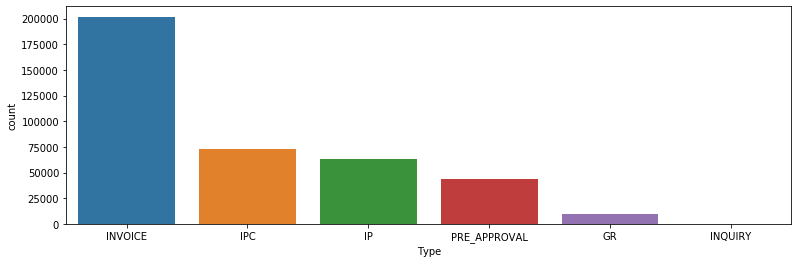

In [72]:
plt.figure(figsize=(13, 4))
sns.countplot(DF.Type, order = DF.Type.value_counts().index);

In [73]:
# We can see that invoice type has the maximum count followed by IPC.

In [74]:
# Bivarate Analysis 

In [75]:
DF.groupby(['IP_Address'])['Vendor_Name'].max()

IP_Address
10.1.1.1       Vendor-99
10.1.1.100    Vendor-999
10.1.1.101     Vendor-98
10.1.1.106     Vendor-99
10.1.1.109     Vendor-99
                 ...    
10.1.2.86     Vendor-999
10.1.2.89      Vendor-99
10.1.2.90      Vendor-99
10.1.2.95     Vendor-999
10.1.2.99      Vendor-99
Name: Vendor_Name, Length: 386, dtype: object

In [76]:
# There is not much inference we can take out about the relation between IP_address and Vendor_Name

----------------------- MODEL BUILDING -----------------------------

In [77]:
# First we will sort data using datetime .
DF1 = DF.sort_values(by="Date_Time")
DF1.head()

,Date_Time,IP_Address,Vendor_Name,Type
396219,2019-06-23 13:15:59,10.1.2.228,Vendor-182,INVOICE
396218,2019-06-23 13:16:05,10.1.1.179,Vendor-182,INVOICE
396217,2019-06-23 13:16:09,10.1.2.139,Vendor-182,INVOICE
396216,2019-06-23 13:16:15,10.1.2.214,Vendor-181,PRE_APPROVAL
396215,2019-06-23 13:16:19,10.1.1.343,Vendor-181,PRE_APPROVAL


In [78]:
# We will make "Date_Time" column as index so that we can find abnormality time wise.
DF1.set_index("Date_Time", inplace = True) 
DF1.head()

,IP_Address,Vendor_Name,Type
Date_Time,,,
2019-06-23 13:15:59,10.1.2.228,Vendor-182,INVOICE
2019-06-23 13:16:05,10.1.1.179,Vendor-182,INVOICE
2019-06-23 13:16:09,10.1.2.139,Vendor-182,INVOICE
2019-06-23 13:16:15,10.1.2.214,Vendor-181,PRE_APPROVAL
2019-06-23 13:16:19,10.1.1.343,Vendor-181,PRE_APPROVAL


In [79]:
# _______________Model No.1 :K-modes Clustering __________________________________

In [80]:
# Importing Libraries and  encoding the variables .
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
DF2 = DF1.apply(le.fit_transform)
DF2.head()

,IP_Address,Vendor_Name,Type
Date_Time,,,
2019-06-23 13:15:59,250,92,2
2019-06-23 13:16:05,33,92,2
2019-06-23 13:16:09,208,92,2
2019-06-23 13:16:15,245,91,5
2019-06-23 13:16:19,100,91,5


In [81]:
# Applying K-modes algorithm to build a model.
from kmodes.kmodes import KModes
km_cao = KModes(n_clusters=5, init = "Cao", n_init = 1, verbose=1)
fitClusters_cao = km_cao.fit_predict(DF2)

Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 53858, cost: 814754.0


In [82]:
fitClusters_cao

array([0, 0, 0, ..., 0, 0, 0], dtype=uint16)

In [83]:
clusterCentroidsDf = pd.DataFrame(km_cao.cluster_centroids_)
clusterCentroidsDf.columns = DF2.columns

In [84]:
# Mode of the clusters
clusterCentroidsDf

,IP_Address,Vendor_Name,Type
0,381,587,2
1,177,154,2
2,164,49,2
3,357,35,4
4,311,5,4


In [85]:
# These are the centroids of the clusters.

In [86]:
# Making a dataframe for clusters.
clustersDf = pd.DataFrame(fitClusters_cao)
clustersDf.columns = ['cluster_predicted']

In [87]:
# Using Date_Time index so that we can indetify the data in different cluster date and time wise.
clustersDf.index=DF2.index

In [88]:
# Combining dataframe with cluster dataframe.
combinedDf = pd.concat([DF2, clustersDf], axis = 1)
#combinedDf = combinedDf.drop(['index', 'level_0'], axis = 1)

In [89]:
combinedDf

,IP_Address,Vendor_Name,Type,cluster_predicted
Date_Time,,,,
2019-06-23 13:15:59,250,92,2,0
2019-06-23 13:16:05,33,92,2,0
2019-06-23 13:16:09,208,92,2,0
2019-06-23 13:16:15,245,91,5,0
2019-06-23 13:16:19,100,91,5,0
...,...,...,...,...
2019-07-08 14:42:55,175,1,4,3
2019-07-08 14:42:57,185,0,5,0
2019-07-08 14:42:59,129,0,5,0


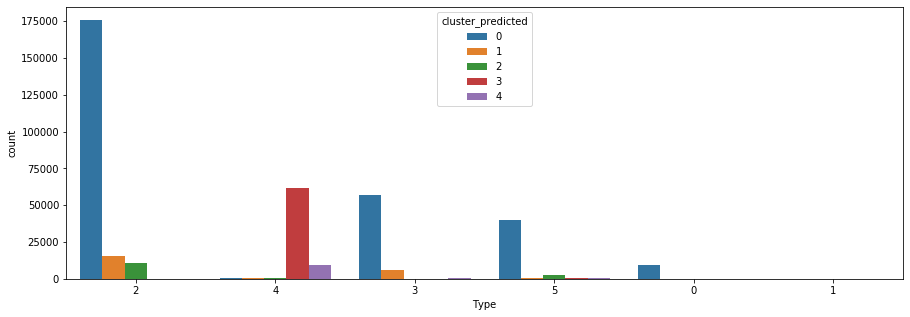

In [90]:
# Plotting Clusters for Type variable.
plt.subplots(figsize = (15,5))
sns.countplot(x=combinedDf['Type'],order=combinedDf['Type'].value_counts().index,hue=combinedDf['cluster_predicted'])
plt.show()

In [91]:
#___________________________Model No.2 IsolationForest_______________________________

In [92]:
# Importing libraries
from sklearn.ensemble import IsolationForest

In [93]:
# Checking DataFrame.
DF2.head()

,IP_Address,Vendor_Name,Type
Date_Time,,,
2019-06-23 13:15:59,250,92,2
2019-06-23 13:16:05,33,92,2
2019-06-23 13:16:09,208,92,2
2019-06-23 13:16:15,245,91,5
2019-06-23 13:16:19,100,91,5


In [94]:
# Applying IsolationForest algorithm .
iso_forest = IsolationForest(n_estimators=300, contamination=0.10)

iso_forest = iso_forest.fit(DF2) 
isof_outliers = iso_forest.predict(DF2)
isoF_outliers_values = DF2[iso_forest.predict(DF2) == -1]
isoF_outliers_values

,IP_Address,Vendor_Name,Type
Date_Time,,,
2019-06-23 13:16:15,245,91,5
2019-06-23 13:16:19,100,91,5
2019-06-23 13:16:25,248,91,5
2019-06-23 13:16:29,22,91,5
2019-06-23 13:16:35,329,91,5
...,...,...,...
2019-07-08 14:12:36,364,1,4
2019-07-08 14:12:36,364,1,4
2019-07-08 14:42:53,372,1,4


These are the abnormal data in the data provided.

In [95]:
# Checking Shape of outliers
isoF_outliers_values.shape

(39139, 3)

In [96]:
# Checking the shape of original dataframe
DF2.shape

(391382, 3)

Conclusion::
IsolationForest model has predicted that 39132 datapoints are abnormal out of total 391382 datapoints.

In [97]:
#-------END--------#